In [ ]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [2]:
x = {
    "a":1
}

result: {'message': ['Hello!', 'Hello, kwangjo nice to meet you']}


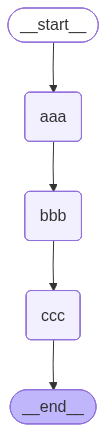

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict
from typing import Annotated
import operator
from langgraph.types import  CachePolicy
from langgraph.cache.memory import InMemoryCache
from datetime import  datetime
import time


def update_function(old, new):
    print("old->", old)
    print("new->", new)
    return old + new

class State(TypedDict):
    #message: Annotated[list[str], update_function]
    #message: Annotated[list[str], operator.add]
    time: str

graph_builder = StateGraph(State)

def node_one(state: State):
    #print("node_one",state)
    return {}
def node_two(state: State):
    #print("node_two",state)
    return {
        "time": f"{datetime.now()}"
    }
def node_three(state: State):
    #print("node_three",state)   
    return {}
'''
def node_four(state: PrivateState)->OutputState:
    print("node_four",state)   
    return {
        "bye":"world",
    }

def node_five(state: OutputState):
    return{
        "secret": True
    }

def node_six(state: MegaPrivate):
    print(state)
'''


graph_builder.add_node("aaa", node_one)
graph_builder.add_node("bbb", node_two, cache_policy= CachePolicy(ttl=20))
graph_builder.add_node("ccc", node_three)
'''
graph_builder.add_node("ddd", node_four)
graph_builder.add_node("eee", node_five)
graph_builder.add_node("fff", node_six)
'''
graph_builder.add_edge(START, "aaa")
graph_builder.add_edge("aaa", "bbb")
graph_builder.add_edge("bbb", "ccc")
graph_builder.add_edge("ccc", END)
'''
graph_builder.add_edge("ddd", "eee")
graph_builder.add_edge("eee", "fff")
graph_builder.add_edge("fff", END)
'''
graph = graph_builder.compile(cache= InMemoryCache())

print(graph.invoke({}))
time.sleep(5)
#print("result:", result)

#graph.get_graph().draw_ascii()

graph
